# GG4257 - Urban Analytics
---
## Assignment 1
---

### Lab 4 Challenges

add in a table with hyperlinks to each challenge

### Challenge 1

- **Part 1** : With a critical eye, **select two cities (e.g. Singapore vs Bogotá) and compare two indicators using the tools provided by the dashboard. You can use the linear regression chart to explore them and see how different those  cities are.**


Opting to follow the theme set out by my choice in locations for this assignment so far, I've opted to compare two Australian cities: Sydney and Brisbane.

- **Part 2** : The authors of this study propose that urban networks can be utilized for more than just measuring connectivity, mobility patterns or linear movement. Their research focuses on integrating multiple dimensions and allowing users to cross-check them with other factors such as built-in areas, population, and points of interest. Authors claim that this approach offers a more comprehensive approach to urban analytics. **However, with a critical view, what do you think are the top three caveats, pitfalls, or assumptions of this approach?**

### Challenge 2: Creating an ArcGIS Dashboard
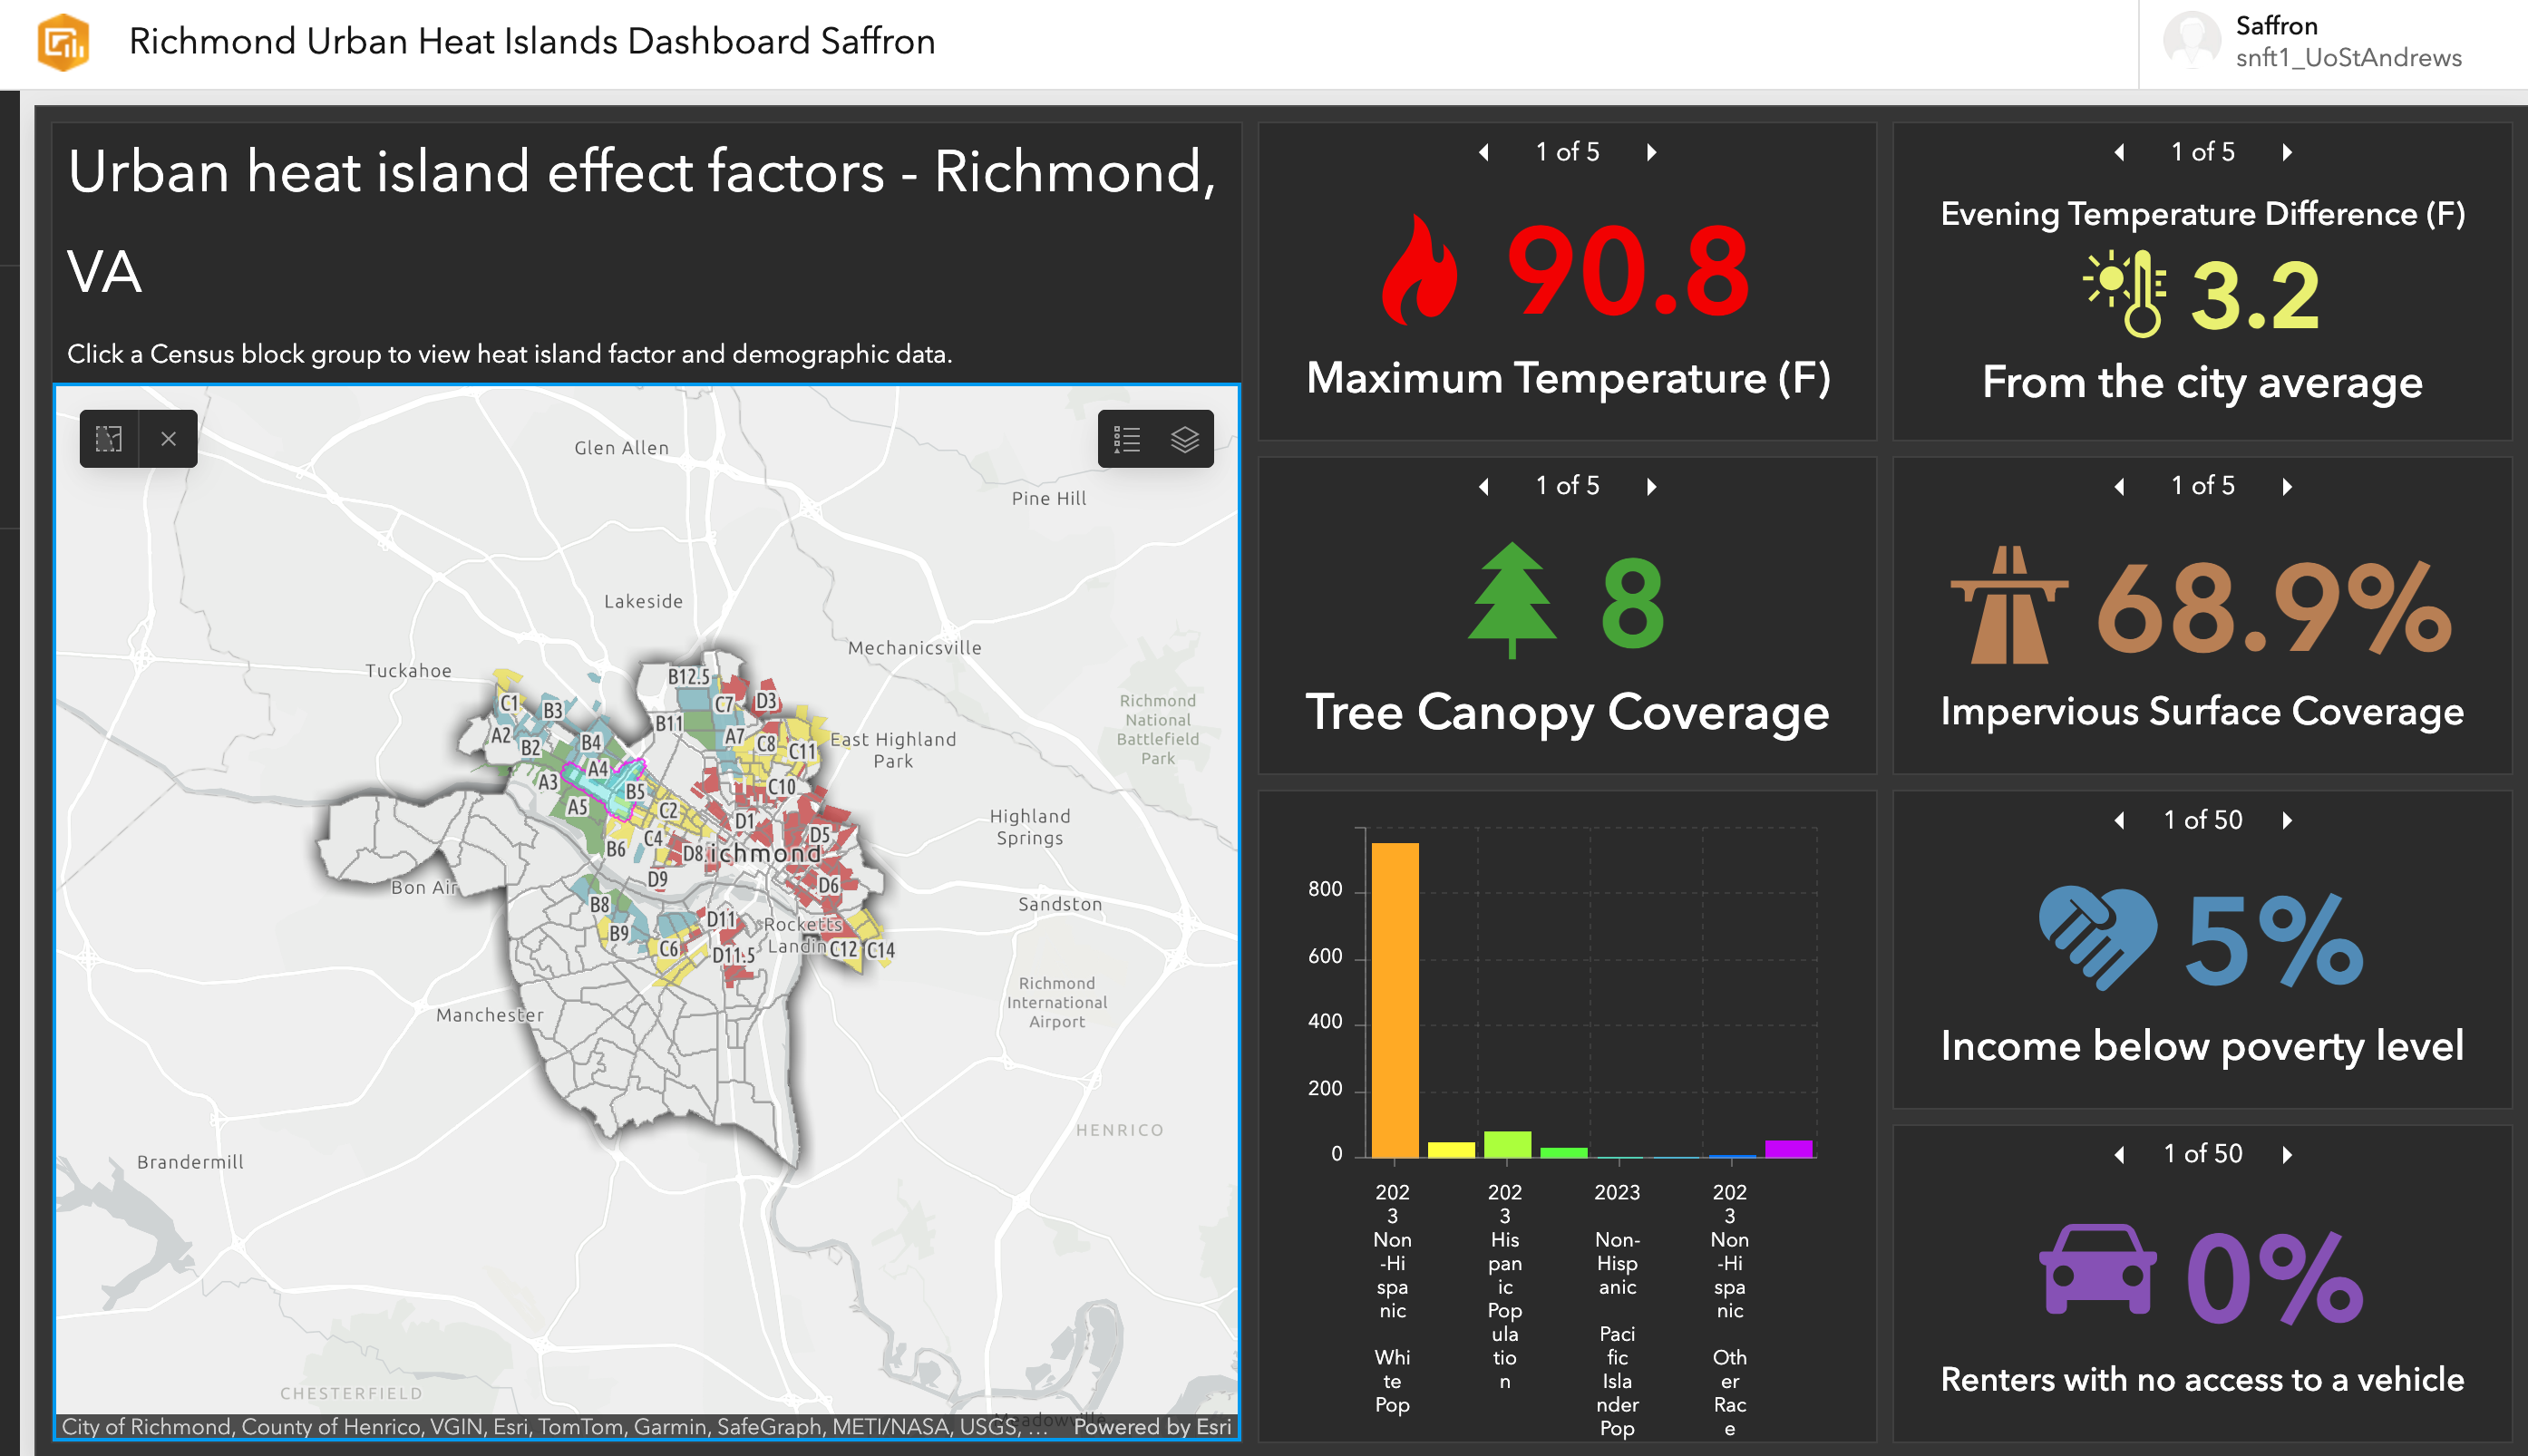

Url: https://www.arcgis.com/apps/dashboards/a0ed457ba2b54957aec0f89f80283905

### Challenge 3
 
Now is the time for you to create some choropleth maps. 

1. Go to this portal https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/home
2. Get the Scottish Index of Multiple Deprivation (SIMD) 2020 dataset and extract the data only for the city of Edinburgh.
3. Create two static choropleth maps (e.g. `matplotlib`). These maps should represent an attribute you find interesting in the SIMD dataset. Using two different classifier methods, you need to show how the maps appear different even though the data and attributes are the same. Include a clear description of your choice and the difference in the classification method for the attribute chosen (e.g. Plotting histograms with breakpoints(bins). You can find a complete list of classifiers at https://pysal.org/mapclassify/api.html.
4. Finally, create other two interactive maps (e.g. `choropleth_mapbox`) - one for Glasgow and one for Edinburgh - to represent the difference in deprivation for both cities. Pick any of the available attributes.
   > As always include the appropriate descriptions and code comments where you narrate how you are processing the data. And the insights you get from the results.

In [ ]:
import geopandas as gpd
import plotly.express as px
import json

In [ ]:
SIMD_2020 = gpd.read_file('lab4 data/SG_SIMD_2020.shp')

In [ ]:
SIMD_2020.to_file('SIMD_2020_2.geojson', driver='GeoJSON')

In [ ]:
SIMD_2020_geo = gpd.read_file('SIMD_2020_2.geojson')

In [ ]:
# finding out what the edinburgh is labelled as
SIMD_2020_geo['LAName'].unique()

In [ ]:
edi_SIMD_2020 = SIMD_2020_geo.loc[(SIMD_2020_geo.LAName == "City of Edinburgh")]
edi_SIMD_2020.head()

In [ ]:
# having a little look at what attributes we've got available here
edi_SIMD_2020.columns

In [ ]:
edi_SIMD_2020.dtypes

In [ ]:
edi_SIMD_2020.crs

In [ ]:
choro1 = px.choropleth(edi_SIMD_2020,
                    geojson=edi_SIMD_2020.geometry,
                    locations=edi_SIMD_2020.index,
                    color="CrimeRate",
                  

In [ ]:
fig = px.choropleth(edi_SIMD_2020, 
                    geojson=edi_SIMD_2020.geometry,
                    locations=edi_SIMD_2020.index,
                    color='CrimeRate',
                    color_continuous_scale="Viridis",
                    range_color=(0, 12),
                    labels={'unemp':'unemployment rate'}
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
  projection="mercator", #Why do you think we had to use this?
                   )
choro1.update_geos(fitbounds="locations", visible=False)
choro1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
choro1.show()